In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import statistics
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
bnb="belize_airbnb_listings.csv"
df=pd.read_csv(bnb)
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36666,Mo's Cozy Casa w/ veranda & access to dock,157752,Monique,Belize,Belize Islands,17.747860,-88.023980,Entire home/apt,141,3,250,2/23/2021,2.00,5,225
1,36690,Mo's Cozy Cabana w/ comfy veranda & access to ...,157752,Monique,Belize,Belize Islands,17.748320,-88.024740,Entire home/apt,71,3,316,2/19/2021,2.46,5,164
2,108932,Purple House eco solar w/ ocean & wildlife views,563377,Michael,Belize,Belize Islands,17.732210,-88.038240,Entire home/apt,191,2,30,3/14/2020,0.78,1,364
3,110483,Michelo's fuchsia suite,567809,Michel,Stann Creek,Stann Creek Mainland,16.521140,-88.369260,Hotel room,121,1,27,2/24/2020,0.29,3,331
4,120115,Seaside Villas Second Floor Unit #4,604999,Bobbi,Belize,Belize Islands,17.741660,-88.023950,Entire home/apt,343,1,30,3/18/2020,0.64,22,203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2791,48283996,Magical Island,17994012,Ronald,Belize,Belize Islands,17.945690,-87.944620,Entire home/apt,1054,3,0,NaN,NaN,2,347
2792,48287613,"The Luxury Suite - Corozal, Bz- 3Bdr/2bthr CASA1",375769845,Michael,Corozal,Corozal,18.374630,-88.400190,Entire home/apt,401,3,0,NaN,NaN,2,302
2793,48296096,Lagoon front apartment w/shared pool - two mi...,76414486,Vacasa Belize,Belize,Belize Islands,17.934580,-87.955220,Entire home/apt,252,1,0,NaN,NaN,204,364
2794,48296978,Beachfront Poolside Condo,15308338,Alexandra,Belize,Belize Islands,17.930010,-87.957120,Entire home/apt,242,3,0,NaN,NaN,4,364


#### 1.Create two histograms in a subplot (vertical or horizontal is fine) that show the distribution of reviews_per_month and number_of_reviews in Belize Airbnb data 
How do you choose your bin size?

#### Bin sizes can be choosed using multiple ways. Here i am using  Rice formulae:

In [4]:
n= df['id'].count()  # geting the row count
k= 2*(n**(1/3))
k        # Bin count rounded to nearest whole number 29

28.17576510491762

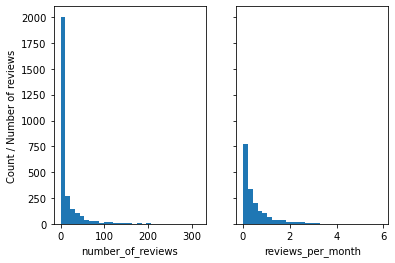

In [5]:
fig,ax=plt.subplots(1,2,sharey=True)
ax[0].hist(df['number_of_reviews'],bins= 29,histtype='bar')
ax[1].hist(df['reviews_per_month'],bins=29,histtype='bar')
ax[0].set_xlabel("number_of_reviews")
ax[1].set_xlabel("reviews_per_month")
ax[0].set_ylabel("Count / Number of reviews")
plt.show()

### 2.Create a box and whisker plot for availability_365. What does this show you?

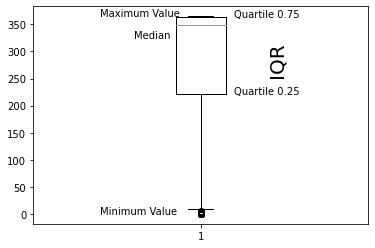

In [6]:
plt.boxplot(df['availability_365'])
plt.text(x=0.8, y=325, s="Median")
plt.text(x=1.1, y=221, s="Quartile 0.25")
plt.text(x=1.1, y=364, s="Quartile 0.75")
plt.text(x=1.2, y=260, s="IQR",rotation=90,size=20)
plt.text(x=0.7, y=365, s="Maximum Value")
plt.text(x=0.7, y=0, s="Minimum Value")
plt.show()

### Observations: 
#### Avalibility_365 column represents avalibility of the rental in days out of an year. 
#### Box plot shows 5 point summary of the data. It represents min value which is at the bottom whisker,  top whisker as the max value, box bottom as the quartile 1 and orange line as second quartile or the median of the data, top of box as the quartile3.
####  1. Data is stacked (top of the box plot) and median is at 349 days implies that the data is left skewed.
####  2. Less space between the quartile 3 and max value implies less variation between 344 to 354 days. Also implies data is stacked.
####  2. 75% of the rentals are avaliable more than 221 days of the year.
####  3. Lower whisker that represents the data from quartile 1 to the min value implies that there is huge variation in avaliabilities that varies from 1 day through 221 days of the year.
####  4. 171 Outliers that are below the min values tells that the avaliability for these rentals is not avaliable currently. This is may be due to advance booking for the entire year or haulted rented due to some other maintenance purposes.



## 3.What is the probability that the price for an Airbnb is under $50.
What do you notice about these records? Hint: look at the other columns.
What distribution does this data most closely fit?


In [7]:
stats.norm.cdf(50,df['price'].mean(),df['price'].std())

0.29275508850857496

#### There is 29.2% probablity that the price for an airbnb is less than $50.

In [8]:
# Tried different way to calculate chances:

df_50=df[df['price']<50]  # Filtering out records with price less than $50
df_50

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
134,4005831,"Home away from home, Shared dormitory, NO AC",9315171,Julia,Belize,Belize Mainland,17.51482,-88.22233,Private room,20,1,2,3/1/2020,0.03,10,365
148,4304743,"DORMITORY Bed #1 of 6, on Maya Ruin",2084006,Lower Dover,Cayo,Cayo,17.21379,-88.94974,Shared room,36,1,1,2/10/2020,0.08,4,365
172,4936432,"Home away from home, Shared dormitory, NO AC",9315171,Julia,Belize,Belize Mainland,17.51426,-88.22121,Shared room,20,1,16,2/4/2020,0.24,10,365
189,5509363,"Yaxche Jungle Camp, Dormitory",6960726,Yaxche Jungle Camp,Cayo,Cayo,17.15125,-88.66244,Shared room,24,1,30,2/25/2020,0.42,2,365
196,5717367,Comfortable and Ecological Camping,29641332,Minerva,Cayo,Cayo,17.05410,-89.11378,Entire home/apt,30,1,6,10/16/2017,0.09,1,365
315,10004488,Long Term Stay in the country,48785884,Barbara And Bart,Orange Walk,Orange Walk,18.08422,-88.54060,Entire home/apt,22,28,0,NaN,NaN,2,115
341,10857678,Gecko Cabin,52665457,Vanessa,Stann Creek,Stann Creek Mainland,17.03210,-88.51931,Private room,28,7,1,3/5/2020,0.08,9,218
343,11010397,Tree Frog Cabin,52665457,Vanessa,Stann Creek,Stann Creek Mainland,17.03278,-88.51718,Private room,28,7,2,4/23/2019,0.08,9,218
344,11015225,Fern Cabin,52665457,Vanessa,Stann Creek,Stann Creek Mainland,17.03380,-88.51922,Private room,28,7,7,2/15/2020,0.19,9,218
346,11057764,Jacamar Cabin,52665457,Vanessa,Stann Creek,Stann Creek Mainland,17.03246,-88.51903,Private room,28,7,3,12/24/2019,0.08,9,218


In [9]:
rec_50= df_50['price'].count()  # Filtering out price column with records that have price less than $50.
rec_50

49

In [10]:
tot_rec=df['price'].count()       #  total number of possible outcomes (records)
tot_rec

2796

In [11]:
prob_price_50=rec_50/tot_rec    # probability that the price for an Airbnb is under $50
prob_price_50

0.017525035765379112

In [12]:
prob_price_less_equal_50= df[df['price']<=50]['price'].count()/tot_rec  
prob_price_less_equal_50        
                                   #probability that the price for an Airbnb is less than or equal to $50

0.02503576537911302

#### 3.b.What do you notice about these records? 

(array([ 3.,  6., 14.,  0.,  6., 13.,  7.]),
 array([20., 24., 28., 32., 36., 40., 44., 48.]),
 <BarContainer object of 7 artists>)

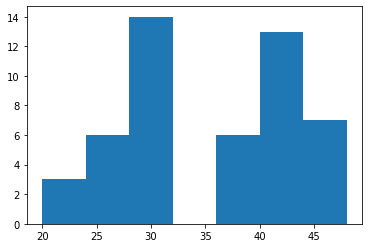

In [13]:
# distribution this data most closely fit

plt.hist(df_50['price'],bins='auto')      

#### Its been observed that there are no rental places avaliable between price level 32 to 36.

#### Price for shared room is much expensive than private room or an entire home at very small instance which may be outlier or an area that is far from all major places like airport.


#### 3.c. What distribution does this data most closely fit?

(array([ 85., 242., 319., 359., 331., 174., 208., 170.,  89., 100.,  95.,
         59.,  79.,  59.,  44.,  58.,  17.,  28.,  16.,  26.,  23.,  39.,
         11.,   0.,  14.,   9.,  15.,   3.,   7.,   6.,   3.,   4.,  13.,
          6.,   5.,   4.,   3.,   4.,   2.,   6.,   2.,   0.,   1.,   6.,
          2.,   0.,   0.,   6.,   1.,   1.,   0.,   2.,   0.,   1.,   0.,
          0.,   5.,   0.,   0.,   3.,   1.,   0.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   2.,   1.,   0.,   0.,   0.,
          0.,   3.,   0.,   1.,   1.,   0.,   0.,   2.,   0.,   0.,   1.,
          0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   1., 

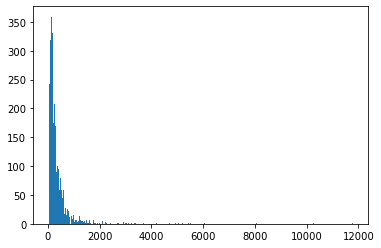

In [33]:
plt.hist(df['price'],bins='auto')

### Price is considered as continuous data and falls under normal distribution. 
#### Data is highly skewed and hence applying log transformation for the data to conform to normality.

(array([  3.,   6.,  14.,   5.,  14.,   7.,  37.,  38.,  73., 126., 109.,
        180., 162., 231., 217., 225., 234., 197., 133., 143., 143., 115.,
         90.,  62.,  67.,  41.,  29.,  22.,  21.,  11.,  10.,   3.,   7.,
          6.,   3.,   2.,   5.,   2.,   0.,   1.,   0.,   2.]),
 array([2.99573227, 3.14761573, 3.29949918, 3.45138264, 3.60326609,
        3.75514954, 3.907033  , 4.05891645, 4.21079991, 4.36268336,
        4.51456681, 4.66645027, 4.81833372, 4.97021718, 5.12210063,
        5.27398408, 5.42586754, 5.57775099, 5.72963445, 5.8815179 ,
        6.03340135, 6.18528481, 6.33716826, 6.48905172, 6.64093517,
        6.79281862, 6.94470208, 7.09658553, 7.24846899, 7.40035244,
        7.5522359 , 7.70411935, 7.8560028 , 8.00788626, 8.15976971,
        8.31165317, 8.46353662, 8.61542007, 8.76730353, 8.91918698,
        9.07107044, 9.22295389, 9.37483734]),
 <BarContainer object of 42 artists>)

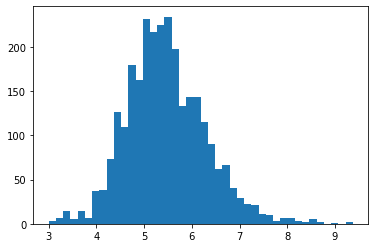

In [36]:
log_price=np.log(df['price'])

plt.hist(log_price,bins='auto')

### 4.Calculate the sample variance and standard deviation for all the numerical columns in the same output. 
Why sample variance and not population variance?
What is your takeaway for each metric?
What are the scales of measurement for each of these values? 

In [16]:
df_v=df.var(ddof=1)    # dataframe to calculate Variance
df_v

id                                1.661428e+14
host_id                           1.036327e+16
latitude                          2.888413e-01
longitude                         1.473608e-01
price                             3.171096e+05
minimum_nights                    3.214712e+01
number_of_reviews                 9.197735e+02
reviews_per_month                 4.384482e-01
calculated_host_listings_count    2.674046e+03
availability_365                  1.454861e+04
dtype: float64

In [17]:
df_s=df.std()     # dataframe to calculate Standard Deviation
df_s

id                                1.288964e+07
host_id                           1.018001e+08
latitude                          5.374396e-01
longitude                         3.838760e-01
price                             5.631248e+02
minimum_nights                    5.669843e+00
number_of_reviews                 3.032777e+01
reviews_per_month                 6.621542e-01
calculated_host_listings_count    5.171118e+01
availability_365                  1.206176e+02
dtype: float64

In [18]:
df_final=pd.concat([df_v,df_s],axis=1)
df_final.columns=['Vairance','Std']
df_final

,Vairance,Std
id,1.661428e+14,1.288964e+07
host_id,1.036327e+16,1.018001e+08
latitude,2.888413e-01,5.374396e-01
longitude,1.473608e-01,3.838760e-01
price,3.171096e+05,5.631248e+02
minimum_nights,3.214712e+01,5.669843e+00
number_of_reviews,9.197735e+02,3.032777e+01
reviews_per_month,4.384482e-01,6.621542e-01
calculated_host_listings_count,2.674046e+03,5.171118e+01
availability_365,1.454861e+04,1.206176e+02


#### 4.b.Why sample variance and not population variance?

#### Population variance is calculated using the whole data therefore the variance is too high as compared to sample variance. Sample variance is always preferred over the population variance it represents the unbiased represent of population variance. Also the value of sample variance is close to the population variance because of less variability. Mostly not all the items population data is avaliable due to some logistic issues also the data collection expensive and includes several resources. Also, the results which are used to understand similar instances gives good results. 

#### 4.c.What is your takeaway for each metric?


####  Data set what we are analysis is the sample data set not the population. Hence the anlysis can be implemented over the population and can also get similar results.  Price has huge variation which tells that there is huge selection options for the tenant to choose from lowest to the costly fare.Latitude and Longitude has less variation which implies that the rentals are clustered together. Similarly with the minimum nights data is closely related. 

#### 4.d.What are the scales of measurement for each of these values? 

#### id - Ordinal 
#### host_id - Ordinal
#### latitude -	Interval
#### longitude - Interval
#### price - Ratio
#### minimum_nights	- Ordinal
#### number_of_reviews -Ordinal
#### reviews_per_month - Ordinal
#### calculated_host_listings_count -Ordinal
#### availability_365 - Ordinal
#### log_price - Ratio

### 5.What percent of Airbnb listings in Belize are available 360 days a year or more?
360 days or less?
What distribution does this data most closely fit?


#### 5.a.percent of Airbnb listings in Belize are available 360 days a year or more?

In [38]:
1-stats.poisson.cdf(360,df['availability_365'].mean(),df['availability_365'].std())

0.9936248186314307

#### 5.b.percent of Airbnb listings in Belize are available 360 days a year or less?

In [37]:
stats.poisson.cdf(360,df['availability_365'].mean(),df['availability_365'].std())

0.00637518136856931

#### 5.c. What distribution the data closely fit?

(array([ 251.,   14.,   47.,   21.,   73.,   14.,   18.,   30.,  176.,
          16.,   43.,   35.,   48.,  105.,   90.,  120.,  220., 1475.]),
 array([  0.        ,  20.27777778,  40.55555556,  60.83333333,
         81.11111111, 101.38888889, 121.66666667, 141.94444444,
        162.22222222, 182.5       , 202.77777778, 223.05555556,
        243.33333333, 263.61111111, 283.88888889, 304.16666667,
        324.44444444, 344.72222222, 365.        ]),
 <BarContainer object of 18 artists>)

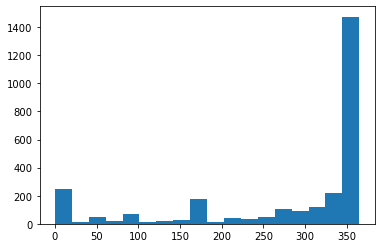

In [21]:
plt.hist(df['availability_365'],bins='auto')

### Distribution for the availability_365 closely fit into Poisson. As the data has been collected using a fixed time interval of year.

#### Another way of calculating:

In [22]:
more_360=df[df['availability_365']>=360]['availability_365'].count()
more_360

1105

In [23]:
less_360= df[df['availability_365']<=360]['availability_365'].count()
less_360

1721

In [24]:
tot_365=df['availability_365'].count()
tot_365

2796

In [25]:
p_more_365= more_360/tot_365
p_more_365

0.3952074391988555

In [26]:
p_less_360=less_360/tot_365
p_less_360

0.6155221745350501

### 6.What minimum night count are 75% of Airnbnb listing in Belize greater than?


In [27]:
df['minimum_nights'].describe()

count    2796.000000
mean        2.263948
std         5.669843
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       180.000000
Name: minimum_nights, dtype: float64

#### Quantile 3 that hold 75% data is at 3 nights. Hence the 75% and greater of airbnb listing will be having less than or equal to 3 nights.

#### Alternatively:

In [28]:
stats.poisson.ppf((1-0.75),df['minimum_nights'].mean(),df['minimum_nights'].std())

6.6698432082950365